este código esta echo para estudiar la eficiencia y la precicion de las funciones de activacion prelu y leakyrelu y ver cual es mejor para un caso de regrecion para calcular el alquiler de una bivienda.

In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU, LeakyReLU
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import os

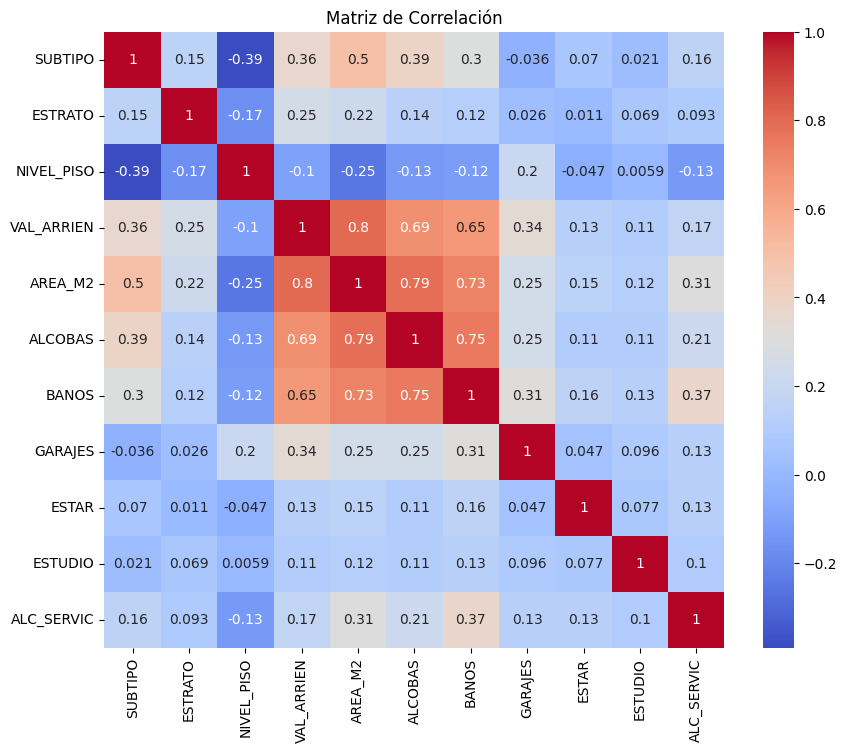

In [2]:
# Crear directorios para guardar los modelos y los gráficos
directories = ['saved_models', 'saved_models2', 'graphs', 'graphs2']
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Cargar datos
data = pd.read_csv('Arriendo2.csv')
data = data.dropna()

# Visualización de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Preparar los datos
X = data.drop('VAL_ARRIEN', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.log(data['VAL_ARRIEN'])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Función para crear y entrenar modelos
def create_train_model(activation, units=[64, 64, 32], epochs=100, batch_size=32):
    model = Sequential()
    model.add(Dense(units=units[0], input_dim=X_train.shape[1], activation='linear'))
    
    if activation == 'prelu':
        model.add(PReLU())
    elif activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.01))
    
    for unit in units[1:]:
        model.add(Dense(units=unit, activation='linear'))
        if activation == 'prelu':
            model.add(PReLU())
        elif activation == 'leakyrelu':
            model.add(LeakyReLU(alpha=0.01))
    
    model.add(Dense(1))  # Capa de salida
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error', metrics=['mae', 'accuracy'])
    
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    training_time = time.time() - start_time
    
    val_loss, val_mae, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    num_params = model.count_params()
    
    return [model, history, val_loss, val_mae, val_accuracy, training_time, num_params, len(history.epoch), units]

In [42]:
# Entrenar modelos y evaluar
models_performance = {activation: [] for activation in ['prelu', 'leakyrelu']}
matrix_models = {key: [] for key in ['activations', 'val_loss', 'val_mae', 'val_accuracy', 'training_time', 'num_params', 'epochs']}
activations = ['prelu', 'leakyrelu']
neurons = [[32, 32, 16], [16, 16, 8]]
epochs = [3000, 5000]
models = {'prelu':[],
          'leakyrelu':[]}

for activation in activations:
    for n in neurons:
        for e in epochs:
            model_info = create_train_model(activation, units=n, epochs=e)
            models_performance[activation].append(model_info)
            models[activation].append(model_info[0])
            matrix_models['activations'].append(activation)
            matrix_models['val_loss'].append(model_info[2])
            matrix_models['val_mae'].append(model_info[3])
            matrix_models['val_accuracy'].append(model_info[4])
            matrix_models['training_time'].append(model_info[5])
            matrix_models['num_params'].append(model_info[6])
            matrix_models['epochs'].append(model_info[7])

c:\Users\colab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\colab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\colab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

In [43]:
# Ordenar y seleccionar los mejores modelos
def sort_and_select(models_performance, key_idx, top_n=2):
    sorted_models = {activation: sorted(models_performance[activation], key=lambda x: tuple(x[i] for i in key_idx))[:top_n] for activation in activations}
    return sorted_models

best_models = sort_and_select(models_performance, key_idx=[2, 3, 4, 5])
best_models2 = sort_and_select(models_performance, key_idx=[6, 7])


# Guardar los cuatro mejores modelos
for activation in activations:
    for i, model_info in enumerate(best_models[activation]):
        model_info[0].save(f'saved_models/best_model_{activation}_{i+1}.h5')
    for i, model_info in enumerate(best_models2[activation]):
        model_info[0].save(f'saved_models2/best_model_{activation}_{i+1}.h5')

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


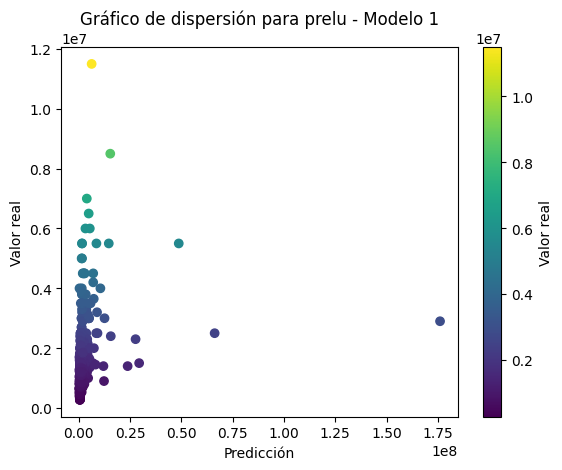

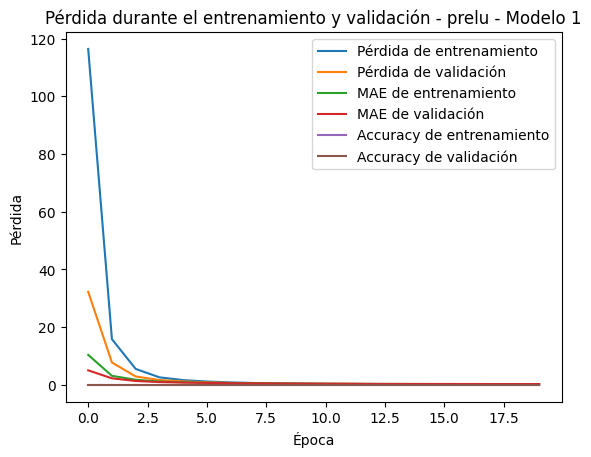

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


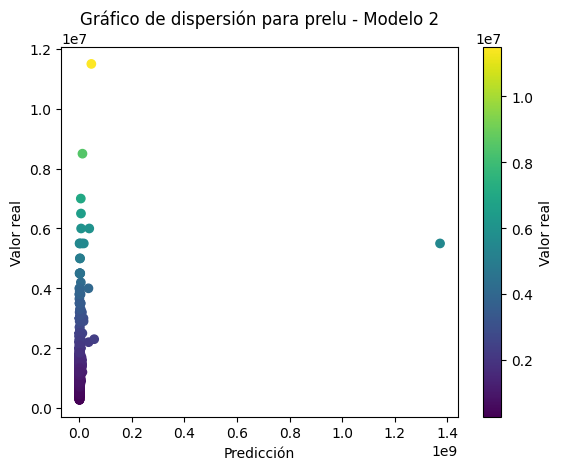

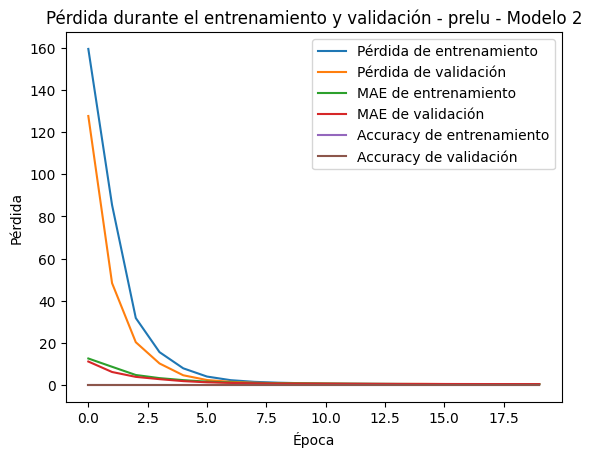

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


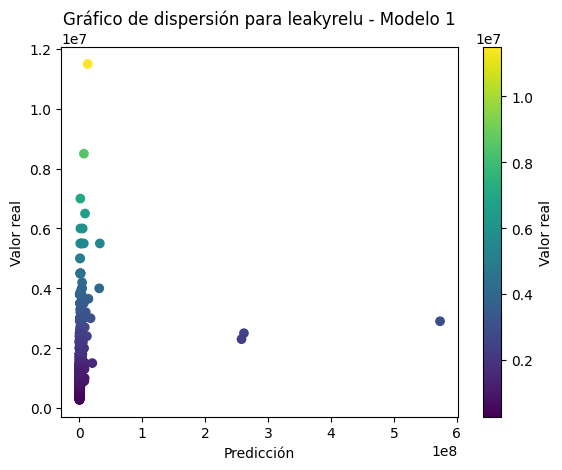

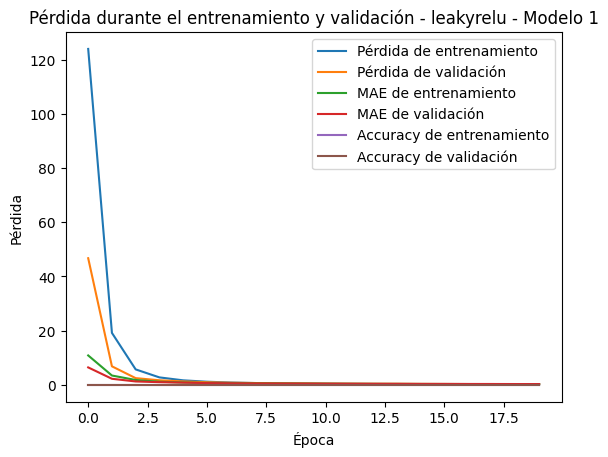

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


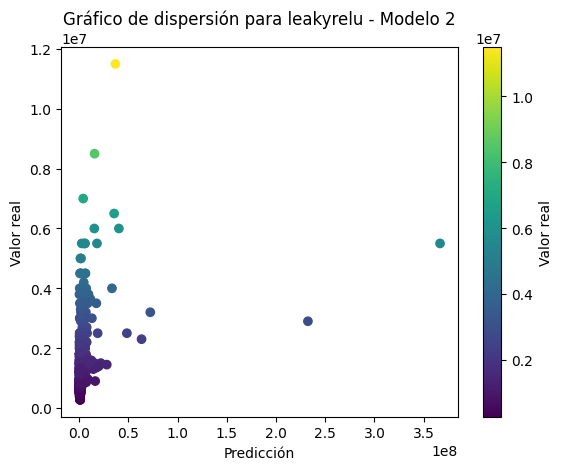

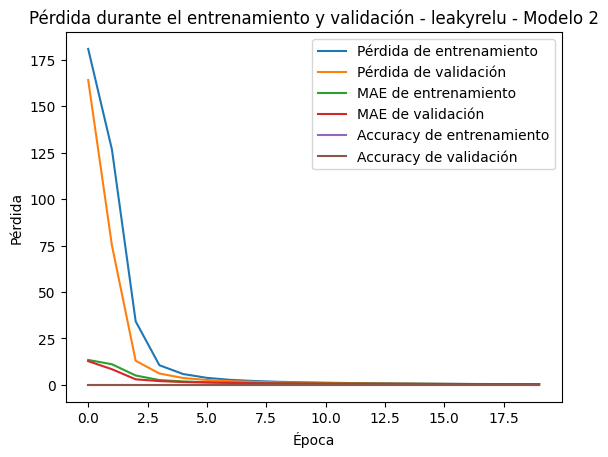

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


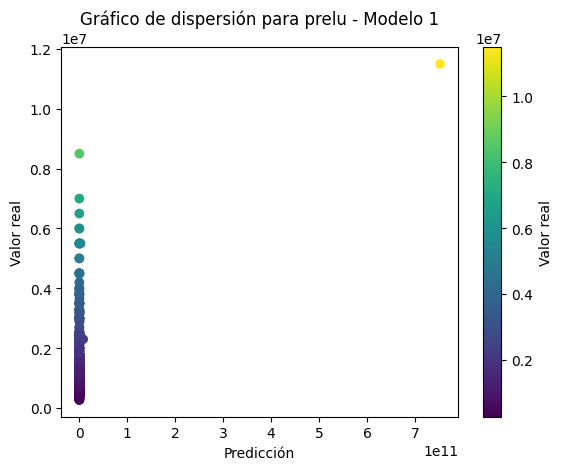

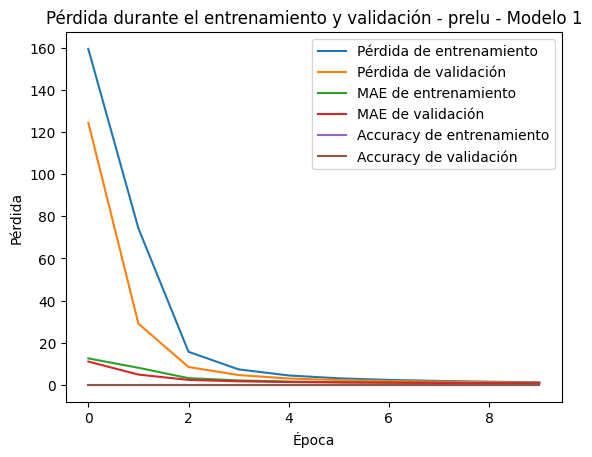

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


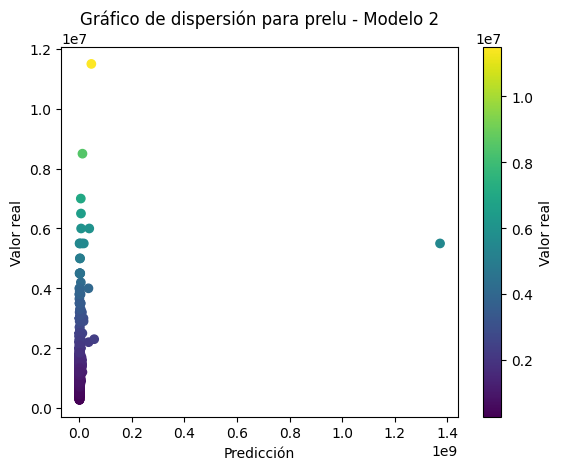

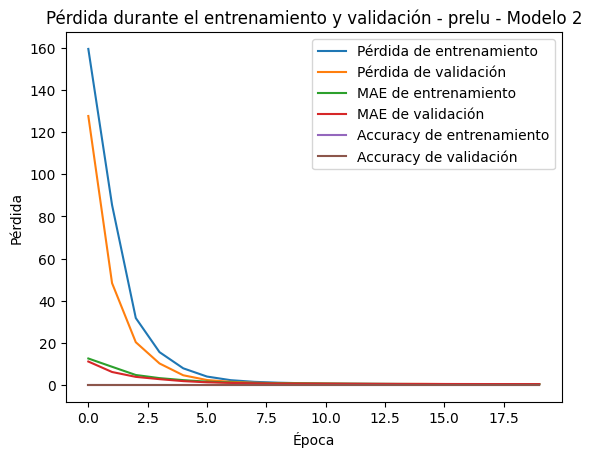

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


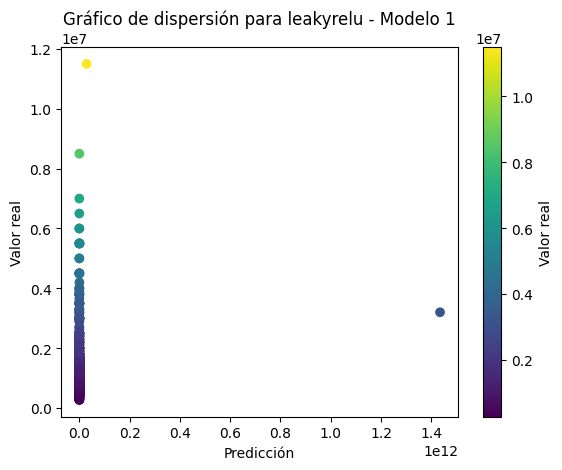

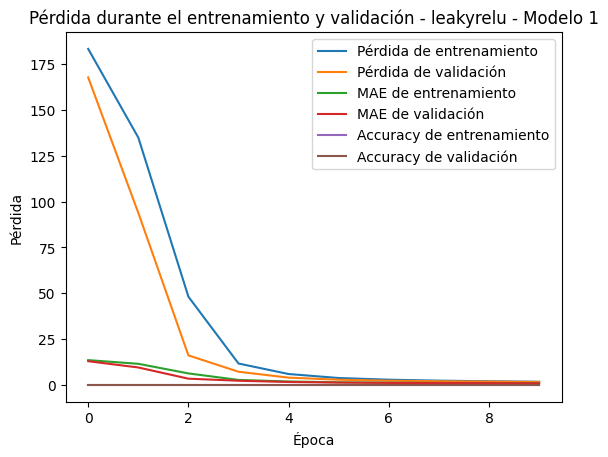

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


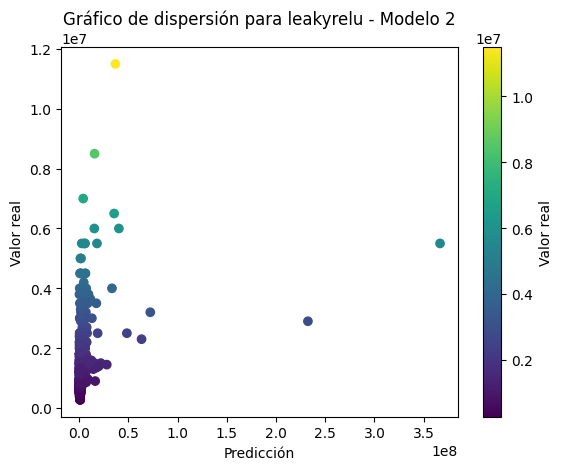

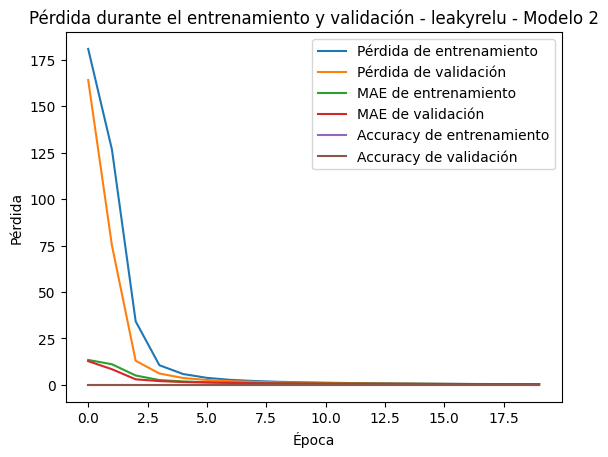

In [44]:
# Crear gráficos de dispersión y pérdida
def plot_and_save_graphs(models, graphs_dir):
    for activation in activations:
        for idx, (model, history, _, _, _, _, _, _, _) in enumerate(models[activation]):
            prediction = np.exp(model.predict(X))
            
            # Gráfico de dispersión
            plt.scatter(y=np.exp(y), x=prediction, c=np.exp(y), cmap='viridis')
            plt.xlabel('Predicción')
            plt.ylabel('Valor real')
            plt.title(f'Gráfico de dispersión para {activation} - Modelo {idx + 1}')
            plt.colorbar(label='Valor real')
            plt.savefig(f'{graphs_dir}/scatter_{activation}_model_{idx + 1}.png')
            plt.show()
            
            # Gráfico de pérdida
            plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
            plt.plot(history.history['val_loss'], label='Pérdida de validación')
            plt.plot(history.history['mae'], label='MAE de entrenamiento')
            plt.plot(history.history['val_mae'], label='MAE de validación')
            plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
            plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
            plt.xlabel('Época')
            plt.ylabel('Pérdida')
            plt.title(f'Pérdida durante el entrenamiento y validación - {activation} - Modelo {idx + 1}')
            plt.legend()
            plt.savefig(f'{graphs_dir}/loss_{activation}_model_{idx + 1}.png')
            plt.show()

plot_and_save_graphs(best_models, 'graphs')
plot_and_save_graphs(best_models2, 'graphs2')

In [7]:
# Asegúrate de tener el conjunto de datos de entrada en la forma correcta
input_data = np.array([[1, 3, 2, 95, 3, 2, 1, 0, 0, 1]])  # Ejemplo de datos de entrada

# Recorre los modelos y activations para hacer las predicciones
for activation in activations:
    for i, model in enumerate(best_models[activation]):
        # Verificar si el objeto tiene el método 'predict'
        if hasattr(model, 'predict'):
            try:
                # Realizar la predicción
                prediction = model.predict(input_data)
                print(f'Predicción para {activation} - Modelo {i+1}: {prediction}')
            except Exception as e:
                # Capturar y mostrar errores de predicción si los hay
                print(f'Error en el modelo {i+1} para {activation}: {e}')
        else:
            print(f'El modelo {i+1} para {activation} no tiene un método predict válido.')

El modelo 1 para prelu no tiene un método predict válido.
El modelo 2 para prelu no tiene un método predict válido.
El modelo 1 para leakyrelu no tiene un método predict válido.
El modelo 2 para leakyrelu no tiene un método predict válido.


In [46]:
pd.DataFrame(matrix_models).to_csv('matrix_models.csv', index=1)

In [39]:
from tensorflow.keras.utils import plot_model
for activation in activations:
    for model in models[activation]:
        
        plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [36]:
models

{'prelu': [<Sequential name=sequential_9, built=True>,
  <Sequential name=sequential_10, built=True>,
  <Sequential name=sequential_11, built=True>,
  <Sequential name=sequential_12, built=True>],
 'leakyrelu': [<Sequential name=sequential_13, built=True>,
  <Sequential name=sequential_14, built=True>,
  <Sequential name=sequential_15, built=True>,
  <Sequential name=sequential_16, built=True>]}